# Data Transformation: Google Earth Engine Images to TensorFlow

## Preamble

In [35]:
import earthengine

In [36]:
import matplotlib.pyplot as plt

## Load Data

## Load Images

In [48]:
region_coords = [-7.471699, -56.010816, -6.606240, -54.886091]

In [53]:
imgs = earthengine.earthengine2images(
    data_source="LANDSAT/LT05/C01/T1_SR",
    date_range=("1999-01-01", "2019-01-01"),
    cloud_cover=100,
    bands = {
        "R": "B3", 
        "G": "B2",
        "B": "B1"
    },
    region_coords=region_coords    
)

EEException: Collection.toList: The value of 'count' must be positive. Got: 0.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(imgs[0])

## Load Deforestation Data 

In [16]:
import ee

In [17]:
ee.Initialize()

In [19]:
deforest = ee.Image("UMD/hansen/global_forest_change_2015").sample(
    region=ee.Geometry.Rectangle(region_coords)
)

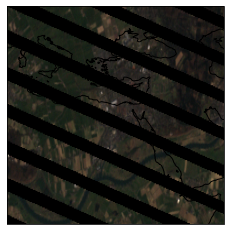

In [14]:
import cartopy.crs as ccrs

img_extent = region_coords
img = imgs[0]

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

plt.show()

In [22]:
!pip install geemap
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

# Checks whether this notebook is running on Google Colab
try:
    import google.colab
    import geemap.eefolium as emap
except:
    import geemap as emap

# Authenticates and initializes Earth Engine
import ee

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

     |████████████████████████████████| 222 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 668 kB 6.7 MB/s eta 0:00:01     |████████▉                       | 184 kB 6.7 MB/s eta 0:00:01


  Created wheel for ipynb-py-convert: filename=ipynb_py_convert-0.4.5-py3-none-any.whl size=4322 sha256=51f42d09d2cee9bed58cb0f460b88c3de950b9aa8317e438133cd2e7e719492a
  Stored in directory: /Users/sascha/Library/Caches/pip/wheels/86/ae/69/f65a51573548046fe7866d751935da250008651513689770ff
Successfully built ipynb-py-convert
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.24.2 which is incompatible.
ERROR: ipyleaflet 0.12.4 has requirement branca<0.4,>=0.3.1, but you'll have branca 0.4.0 which is incompatible.


/usr/local/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [31]:
Map = emap.Map(center=[-5.6,-51.96], zoom=4)
image1 = ee.Image(0).mask(0).toByte()
image2 = image1.paint(deforest, 'fill')  # Get color from property named 'fill'
image3 = image2.paint(deforest, 3, 5)    # Outline using color 3, width 5.

Map.addLayer(image3, {
    'palette': ['000000', 'FF0000', '00FF00', '0000FF'],
    'max': 3,
    'opacity': 0.5
}, "Name Label?")

In [32]:
Map